In [1]:
#import Requierd Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
# import the data and transform it into a pandas dataframe

housing_data = pd.read_csv('/Users/nasr/Cons_Code/CSCN8010_Main/CSCN8010-labs/lab_1/housing.csv')


In [3]:
housing_data = housing_data[housing_data.median_house_value != 500001]

In [21]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [25]:
income_df = housing_data[['median_income','median_house_value']]

print(test)

       median_income  median_house_value
0             8.3252            452600.0
1             8.3014            358500.0
2             7.2574            352100.0
3             5.6431            341300.0
4             3.8462            342200.0
...              ...                 ...
20635         1.5603             78100.0
20636         2.5568             77100.0
20637         1.7000             92300.0
20638         1.8672             84700.0
20639         2.3886             89400.0

[20640 rows x 2 columns]


Text(0.5, 1.0, 'Median Income Vs Median House Value')

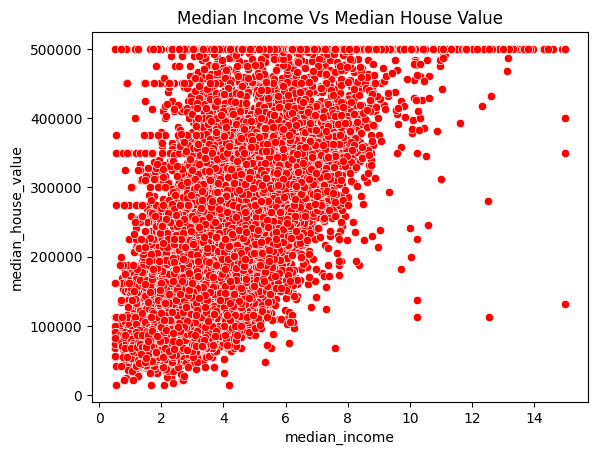

In [24]:

sns.scatterplot(x='median_income', y='median_house_value', data=housing_data,color='red')
plt.title('Median Income Vs Median House Value')

<Axes: xlabel='median_income', ylabel='median_house_value'>

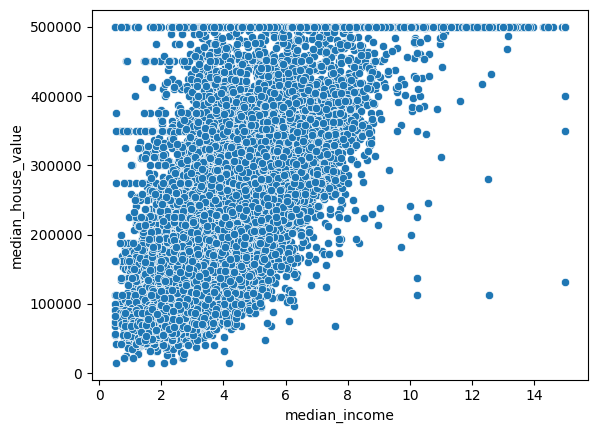

In [26]:
sns.scatterplot(x="median_income", y="median_house_value", data=income_df)


In [45]:
train_size = int(len(income_df) * 0.7)
train = income_df[:train_size]
test = income_df[train_size:]

train

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
14442,4.2296,275000.0
14443,3.3274,295500.0
14444,2.8421,227800.0
14445,2.3284,290600.0


In [34]:
print(train)

       median_income  median_house_value
0             8.3252            452600.0
1             8.3014            358500.0
2             7.2574            352100.0
3             5.6431            341300.0
4             3.8462            342200.0
...              ...                 ...
14442         4.2296            275000.0
14443         3.3274            295500.0
14444         2.8421            227800.0
14445         2.3284            290600.0
14446         2.9200            326500.0

[14447 rows x 2 columns]


In [10]:
from sklearn.model_selection import train_test_split

income_train, income_test, house_value_train, house_value_test = train_test_split(income,house_value, test_size = 0.3, random_state = 0)

In [38]:
model = LinearRegression()

In [42]:
model.fit(X=train[['median_income']],y=train[['median_house_value']])
model.predict(X=train[['median_income']])
model.predict(X=test[['median_income']])

array([[329112.58376675],
       [196839.6941318 ],
       [265474.30192264],
       ...,
       [112647.68889596],
       [119534.62787611],
       [141011.00338001]])

In [43]:
# print the MSE and MAE on the train set
print("Train set")
print(f"Mean squared error: {mean_squared_error(train[['median_house_value']], model.predict(train[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(train[['median_house_value']], model.predict(train[['median_income']]))}")

Train set
Mean squared error: 6477616401.91527
Mean absolute error: 59350.67333112215


In [14]:
mse_income = mean_squared_error(house_value_train, house_value_pred_to_income_train)  
mae_income = mean_absolute_error(house_value_train, house_value_pred_to_income_train)
print("Median house value vs. income - Train set")
print(f"Mean squared error:{mse_income}")
print(f"Mean absolute error: {mae_income}")

Median house value vs. income - Train set
Mean squared error:5554134738.26339
Mean absolute error: 56796.07995844338


In [15]:
# For median house value vs. income test set
mse_income = mean_squared_error(house_value_test, house_value_pred_to_income)
mae_income = mean_absolute_error(house_value_test, house_value_pred_to_income)

print("Median house value vs. income - Test set")
print(f"Mean squared error:{mse_income}")
print(f"Mean absolute error: {mae_income}")

Median house value vs. income - Test set
Mean squared error:5723296991.822416
Mean absolute error: 56922.467178660874


In [16]:
intercept_income = model_income.intercept_
slope_income = model_income.coef_[0]

print(f"Intercept: {intercept_income}")
print(f"Slope: {slope_income}")

Intercept: [44395.7140667]
Slope: [40311.34438939]


TypeError: unsupported format string passed to numpy.ndarray.__format__

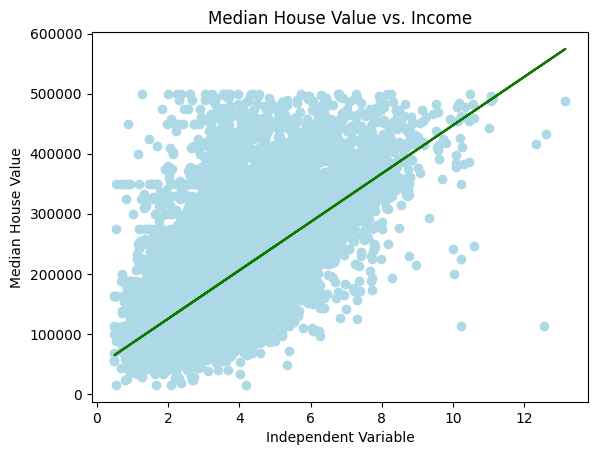

In [44]:
plt.scatter(income_train, house_value_train, color='lightblue', label='Data points')
plt.plot(income_train, slope_income * income_train + intercept_income, color='red', label='Regression line')
plt.plot(income_train,model_income.predict(income_train),color='green',label='Predicted line')
plt.title('Median House Value vs. Income')
plt.xlabel('Independent Variable')
plt.ylabel('Median House Value')
    
# Adding text box with parameters
textstr = '\n'.join((
    f'Intercept: {intercept_income:.1f}',
    f'Slope: {slope_income:.1f}',
    f'MSE: {mse_income:.1f}',
    f'MAE: {mae_income:.1f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
   fontsize=14, verticalalignment='top', bbox=props)
    
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()